<a href="https://colab.research.google.com/github/diksha906/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 # STEP 1:Using bing image downloader to gather data
 
 !pip install bing-image-downloader

In [7]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [8]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower", limit=30, output_dir='data', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/2e/b0/b1/2eb0b15844684b2f18876b211b59ee02.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://cooldigitalphotography.com/wp-content/uploads/2013/11/Sunflower9.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapersite.com/images/wallpapers/beautiful-woman-1440x900-blonde-pretty-girl-5k-2276.jpg
[!] Issue getting: https://wallpapersite.com/images/wallpapers/beautiful-woman-1440x900-blonde-pretty-girl-5k-2276.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #3 from https://wallpapersite.com/images/wallpapers/angel-2560x1440-blue-sky-hd-4k-2884.jpg
[!] Issue getting: https://wallpapersite.com/images/wallpapers/angel-2560x1440-blue-sky-hd-4k-2884.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #3 from https://1.bp.blogspot.com/-vuesf00axv8/WQhLlND7jdI/AAAAAAAAAfs/DDzzdZoob5offfQOex8KljHPS8isfcuWgCLcB/s1600/6.jpeg
[

In [9]:
downloader.download("rugby ball leather", limit=30, output_dir='data', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://asdiansi.com/old-rugbyball.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0068/0227/6407/products/2600_20RAAA13_2082001205_20Ball_20Leather_20Vint_20Dk_20Tan_20Sz5_1024x1024.jpg?v=1557417173
[%] File Downloaded !

[%] Downloading Image #3 from https://d273fid4rql9oz.cloudfront.net/public/uploads/catalog/product/large/4/1/4111_1__392291911.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://openclipart.org/image/800px/svg_to_png/281547/RugbyBall2.png
[%] File Downloaded !

[%] Downloading Image #5 from http://www.cricketwiz.com.au/image/cache/data/autograph ball plain-500x500.jpg
[!] Issue getting: http://www.cricketwiz.com.au/image/cache/data/autograph ball plain-500x500.jpg
[!] Error:: URL can't contain control characters. '/image/cache/data/autograph ball plain-500x500.jpg' (found at least ' ')
[%] Downloading Image #5 from https://w

In [10]:
downloader.download("ice cream cone", limit=30, output_dir='data', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from https://www.joyofkosher.com/.image/t_share/MTMxNzYwMjcxOTk4ODgzMDkw/ice-cream-cone-cupcakes.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img1.etsystatic.com/000/0/5125437/il_570xN.17650243.jpg
[Error]Invalid image, not saving https://img1.etsystatic.com/000/0/5125437/il_570xN.17650243.jpg

[!] Issue getting: https://img1.etsystatic.com/000/0/5125437/il_570xN.17650243.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://gloomth.files.wordpress.com/2019/09/kawaii-clown-makeup.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www2.pictures.zimbio.com/gi/Food+Network+Cooking+Channel+New+York+City+EFcGQFVPRdXx.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.thelisttv.com/wp-content/uploads/2018/09/national-ice-cream-cone-day.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.trbimg.com/img-58f6491d/tu

In [33]:
# STEP 2 : Preprocessing data

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

output = []
data =[]
flatten_input = []

datadir = '/content/data'
categories = ['pretty sunflower', 'rugby ball leather', 'ice cream cone']
for i in categories:
  class_num = categories.index(i)
  variable = os.path.join(datadir, i)    #Path is made to include all the images
  for j in os.listdir(variable):
    j_array = imread(os.path.join(variable, j))
    j_resize = resize(j_array, (150, 150, 3))
    flatten_input.append(j_resize.flatten())
    data.append(j_resize)
    output.append(class_num)

flatten_input = np.array(flatten_input)
output = np.array(output)
data = np.array(data)

In [12]:
#Checking the correctness of the above code
flatten_input[0]

array([0.64169935, 0.69267974, 0.72797386, ..., 0.0125098 , 0.05682353,
       0.02819608])

In [13]:
#Spliting data into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flatten_input, output, test_size=0.3, random_state=100)

In [14]:
# STEP 3 : Apply any classification Algorithm with best parameters using GridSearch CV 

from sklearn.model_selection import GridSearchCV
from sklearn import svm
grid_parameter = [
                  {'C':[1, 10, 100, 1000], 'kernel':['linear']},
                  {'C':[1, 10, 100, 1000], 'gamma':[0.001, 0.0001], 'kernel':['rbf']},                  
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, grid_parameter)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
#Checking accuracy

predicting_y = clf.predict(x_test)
predicting_y


array([1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0,
       2, 0, 1, 0, 0])

In [16]:
y_test

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 1, 0, 0])

In [35]:
#STEP 4 : Evaluate the model using Confusion Matrix and classification report

from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
accuracy_score(predicting_y, y_test)

0.8518518518518519

In [19]:
confusion_matrix(predicting_y, y_test)

array([[10,  0,  1],
       [ 0,  8,  1],
       [ 2,  0,  5]])

In [20]:
#Saving model 

import pickle
pickle.dump(clf, open('img_classification_model.p', 'wb'))

In [21]:
new_model = pickle.load(open('img_classification_model.p', 'rb'))

Enter URLhttps://scx2.b-cdn.net/gfx/news/hires/2019/sunflowers.jpg
(1280, 1920, 3)
OUTPUT PREDICTED: pretty sunflower


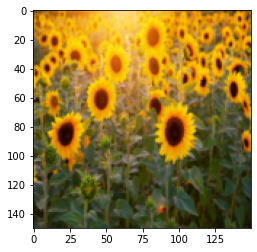

In [40]:
# STEP 5 : Predict for any new Image

flatten_Input = []
url = input('Enter URL')
img = imread(url)
resized = resize(img, (150, 150, 3))
flatten_Input.append(resized.flatten())
flatten_Input = np.array(flatten_Input)
print(img.shape)
plt.imshow(resized)
new_out = new_model.predict(flatten_Input)
new_out = categories[new_out[0]]
print(f'OUTPUT PREDICTED: {new_out}') 

In [44]:
filename = "data" 
folders_or_files_to_save = "data" 
from google.colab import files
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

def save_file_to_drive(name, path):
    file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
    }

    media = MediaFileUpload(path, 
                  mimetype='application/octet-stream',
                  resumable=True)

    created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

    print('File ID: {}'.format(created.get('id')))

    return created


extension_zip = ".zip"

zip_file = filename + extension_zip

# !rm -rf $zip_file
!zip -r $zip_file {folders_or_files_to_save} # FOLDERS TO SAVE INTO ZIP FILE

auth.authenticate_user()
drive_service = build('drive', 'v3')

destination_name = zip_file
path_to_file = zip_file
save_file_to_drive(destination_name, path_to_file)

  adding: data/ (stored 0%)
  adding: data/rugby ball leather/ (stored 0%)
  adding: data/rugby ball leather/Image_30.jpg (deflated 1%)
  adding: data/rugby ball leather/Image_12.jpg (deflated 1%)
  adding: data/rugby ball leather/Image_23.jpg (deflated 12%)
  adding: data/rugby ball leather/Image_19.jpg (deflated 4%)
  adding: data/rugby ball leather/Image_29.jpg (deflated 0%)
  adding: data/rugby ball leather/Image_21.jpg (deflated 2%)
  adding: data/rugby ball leather/Image_1.jpg (deflated 1%)
  adding: data/rugby ball leather/Image_18.jpg (deflated 4%)
  adding: data/rugby ball leather/Image_11.jpg (deflated 12%)
  adding: data/rugby ball leather/Image_14.jpg (deflated 1%)
  adding: data/rugby ball leather/Image_4.png (deflated 3%)
  adding: data/rugby ball leather/Image_7.jpg (deflated 12%)
  adding: data/rugby ball leather/Image_26.jpg (deflated 19%)
  adding: data/rugby ball leather/Image_6.jpg (deflated 2%)
  adding: data/rugby ball leather/Image_25.png (deflated 5%)
  adding: 

{'id': '1XuE9pmwzVLfuRPYX5Hnz-JLw3vKzDMt3'}